# Neural Network trained to convert Celsius to Fahrenheit

To start with my study in **Neural Networks**, I am going to build a NN that only have one input neuron and one output neuron that will recieve a tempeture in Celsius degree and return the same tempeture in Fahrenheit. We all now the formula consisting in:
$$
F=C \cdot 59 + 32
$$
but we are not going to give the explicit formula to the NN, only some train data ($|X_{\text{train}}|=10$).

Let's define the training set:

In [91]:
import numpy as np

temp_C = np.random.uniform(-10, 40, 10)
temp_F = (temp_C * 9/5) + 32


In [92]:
print('The Celsius temperatures that we are using to train the model are: \n {} \n that converted in Fahrenheit are: \n {}'.format(temp_C, temp_F))

The Celsius temperatures that we are using to train the model are: 
 [ 2.27127574 31.64594793 -8.19250688  1.36002719 26.4836291  24.40154999
 20.53355437  3.77363858  6.98750371 26.01313967] 
 that converted in Fahrenheit are: 
 [36.08829633 88.96270628 17.25348761 34.44804893 79.67053238 75.92278999
 68.96039786 38.79254945 44.57750668 78.82365141]


So the **feature** will be `temp_C` and the **target** will be `temp_F`. To create our NN model we are using `TensorFlow` and the framework `Keras`.

In [93]:
import tensorflow as tf

In [94]:
layer = tf.keras.layers.Dense(units = 1, input_shape = [1]) #we only have one neuron in our layer and we have 1 input
model = tf.keras.Sequential([layer])

Now we define how we want our model to work:

In [95]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), #learning rate of the model Adam
    loss = 'mean_squared_error'
)

Now we can train the network:

In [96]:
history = model.fit(temp_C, temp_F, epochs = 1000, verbose = False) 

Let's see the loss function evolution:

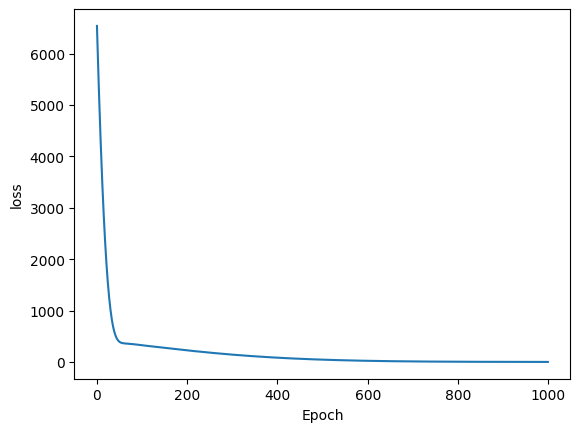

In [97]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

We can see it almost minimize the loss in the 600 epoch. Let's see how it performs with new data:

In [98]:
temp_C_test = np.random.uniform(-10, 40, 10)
temp_F_test = (temp_C_test * 9/5) + 32


In [99]:
temp_F_pred = model.predict(temp_C_test).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [102]:
import pandas as pd

comparation = pd.DataFrame({'Celsius': temp_C_test, 'Real Fahrenheit': temp_F_test, 'Predicted Fahrenheit':temp_F_pred})

comparation

,Celsius,Real Fahrenheit,Predicted Fahrenheit
0,18.014174,64.425514,64.098808
1,9.708721,49.475698,48.791645
2,36.844810,98.320657,98.804161
3,-0.714904,30.713174,29.580637
4,23.431289,74.176321,74.082695
5,20.111320,68.200376,67.963905
6,7.701684,45.863031,45.092625
7,17.607821,63.694077,63.349892
8,27.359975,81.247956,81.323364
9,37.881651,100.186972,100.715088


In [107]:
layer.get_weights() #very similar to the constant in the reaL formula

[array([[1.8430258]], dtype=float32), array([30.898222], dtype=float32)]

In [106]:
mse = np.mean((temp_F_test - temp_F_pred)**2)
print('The MSE is {}, which is pretty good considering we only used 10 training data'.format(mse.round(4)))

The MSE is 0.3152, which is pretty good considering we only used 10 training data


Let's see now if we can improve the NN adding more layers. Anyway, by adding just new layers and more neurons we do not change the fact that it is still a linear parameter adjustment. We also should add **activations function**:

In [108]:
hidden1 = tf.keras.layers.Dense(units=3, input_shape=[1], activation=tf.nn.relu)
hidden2 = tf.keras.layers.Dense(units=3, activation=tf.nn.relu)
output = tf.keras.layers.Dense(units=1)
modelo2 = tf.keras.Sequential([hidden1, hidden2, output])

C:\Users\emaie\Desktop\Porfolio2024\entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), #learning rate of the model Adam
    loss = 'mean_squared_error'
)
history = model.fit(temp_C, temp_F, epochs = 500, verbose = False)

In [110]:
temp_C_test2 = np.random.uniform(-10, 40, 10)
temp_F_test2 = (temp_C_test * 9/5) + 32


In [111]:
temp_F_pred2 = model.predict(temp_C_test).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [115]:
mse = np.mean((temp_F_test2 - temp_F_pred2)**2)
print('The MSE is {}, which is pretty good considering we only used 10 training data'.format(mse))

The MSE is 9.633898803981073e-12, which is pretty good considering we only used 10 training data


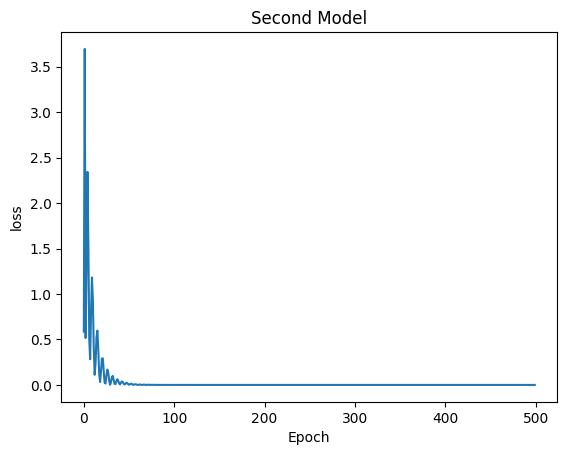

In [116]:
plt.title('Second Model')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

We have could see that the second model is much more powerful than the first one. 